# Preface 
⏩ This is4th  part of ipynb file from my Face Recognition Project using VGG. Please see the first part of ipynb file which is "project_1_EDA.ipynb". The purpose of this Project are compare VGG16 & VGG19 model architecture to identify male/female from the image files <br>
▶ This file used to predict the other image dataset using my best model <br>.
▶ Image files are stored in folder "Datasetest_otherin <br>".
▶ Labare the filenames itself <br>sv"

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.model_selection import train_test_split
import shutil

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

https://susanqq.github.io/UTKFace/

UTKFace
Large Scale Face Datase

Labels
The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg

[age] is an integer from 0 to 116, indicating the age
<br>
[gender] is either 0 (male) or) 1 (female  <br>
[race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).<br>
[date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFacet<br>

⏩ Let's create dataframe which contain filenames and image attributes

In [2]:
img_fn = sorted([ os.path.basename(x) for x in glob.glob('Dataset/test_other/*.jpg') ])
img_fn[0:2]

['38_1_4_20170109003326675.jpg', '39_0_0_20170103183230555.jpg']

In [3]:
img_dict = { 'Filenames' : img_fn }
df_img = pd.DataFrame(img_dict)

In [4]:
df_other = pd.DataFrame(df_img.Filenames.str.split('_').tolist(),
                                 columns = ['Age','Gender','Race', 'DateTime'])

In [5]:
df_other['Filenames'] = df_img['Filenames']

In [6]:
df_other

Age Gender Race               DateTime                     Filenames
0    38      1    4  20170109003326675.jpg  38_1_4_20170109003326675.jpg
1    39      0    0  20170103183230555.jpg  39_0_0_20170103183230555.jpg
2    39      0    0  20170103183234026.jpg  39_0_0_20170103183234026.jpg
3    39      0    0  20170104170046913.jpg  39_0_0_20170104170046913.jpg
4    39      0    0  20170104174019973.jpg  39_0_0_20170104174019973.jpg
..   ..    ...  ...                    ...                           ...
271  48      0    0  20170111203244405.jpg  48_0_0_20170111203244405.jpg
272  48      0    1  20170104212527708.jpg  48_0_1_20170104212527708.jpg
273  48      0    1  20170111203317713.jpg  48_0_1_20170111203317713.jpg
274  48      0    1  20170111203549741.jpg  48_0_1_20170111203549741.jpg
275  48      0    2  20170104204459299.jpg  48_0_2_20170104204459299.jpg

[276 rows x 5 columns]

In [7]:
df_other.loc[df_other['Gender'] == '0', ['Gender']] = 'Male'
df_other.loc[df_other['Gender'] == '1', ['Gender']] = 'Female'
df_other

Age  Gender Race               DateTime                     Filenames
0    38  Female    4  20170109003326675.jpg  38_1_4_20170109003326675.jpg
1    39    Male    0  20170103183230555.jpg  39_0_0_20170103183230555.jpg
2    39    Male    0  20170103183234026.jpg  39_0_0_20170103183234026.jpg
3    39    Male    0  20170104170046913.jpg  39_0_0_20170104170046913.jpg
4    39    Male    0  20170104174019973.jpg  39_0_0_20170104174019973.jpg
..   ..     ...  ...                    ...                           ...
271  48    Male    0  20170111203244405.jpg  48_0_0_20170111203244405.jpg
272  48    Male    1  20170104212527708.jpg  48_0_1_20170104212527708.jpg
273  48    Male    1  20170111203317713.jpg  48_0_1_20170111203317713.jpg
274  48    Male    1  20170111203549741.jpg  48_0_1_20170111203549741.jpg
275  48    Male    2  20170104204459299.jpg  48_0_2_20170104204459299.jpg

[276 rows x 5 columns]

In [8]:
df_other['Gender'] = df_other['Gender'].astype("string")

In [9]:
df_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        276 non-null    object
 1   Gender     276 non-null    string
 2   Race       276 non-null    object
 3   DateTime   276 non-null    object
 4   Filenames  276 non-null    object
dtypes: object(4), string(1)
memory usage: 10.9+ KB


In [10]:
OTHER_PATH = 'Dataset/test_other/'
IMG_SIZE = (218, 178)
BATCH_SIZE = 32
EPOCH_SIZE = 20

⏩ Sampling the image whether the label is accurate or not

In [11]:
def random_show_image(df, PATH, gender_show) :
    
## Sampling random check for male images
    x=0
    fig = plt.figure(figsize = (24,5))
    #for idx, row in df_train[['Filenames']].sample(n=18).iterrows() :
    for idx, row in df.loc[df['Gender'] == gender_show, ['Filenames']].sample(n=18).iterrows() :
          f = row[0]
          img_path = f'{PATH}{f}'
            #print(img_path)
          img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
          img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
          fig.add_subplot(2,9,x+1)
          plt.title(f'filename : {f}', fontsize = 7) 
          plt.axis('off')
          plt.imshow(img)
          x += 1

C:\Users\rumah\AppData\Local\Temp\ipykernel_18956\1915710989.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = row[0]


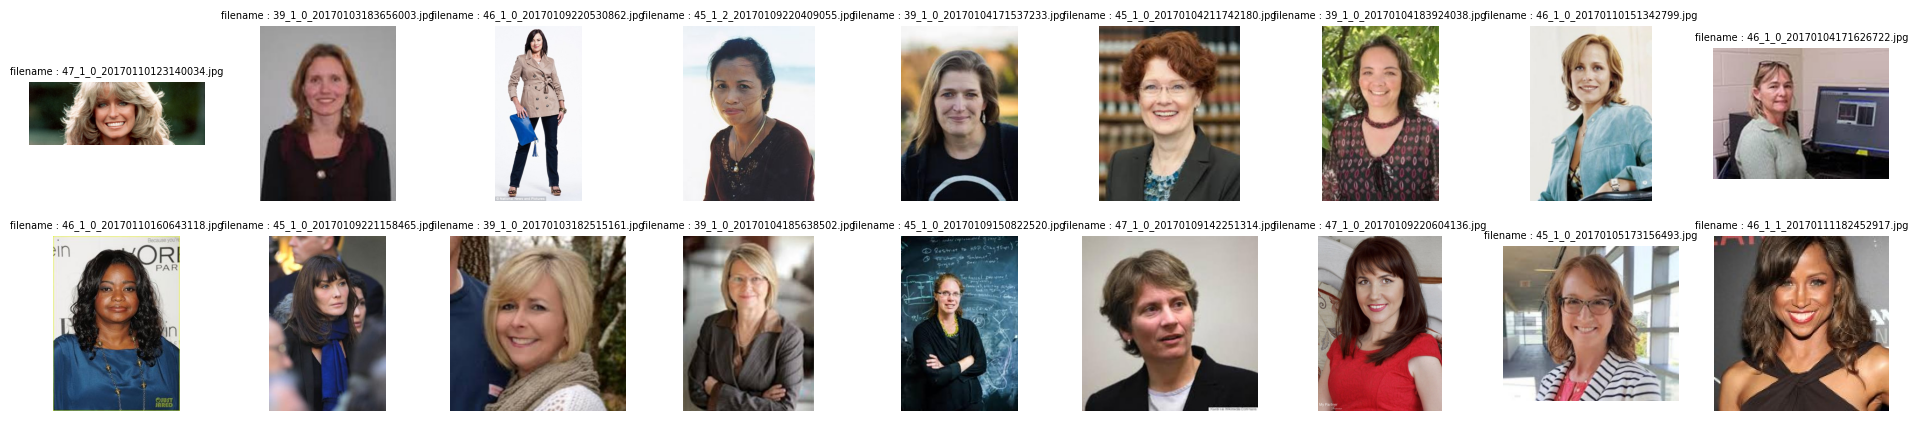

In [12]:
random_show_image(df_other, OTHER_PATH, 'Female')

C:\Users\rumah\AppData\Local\Temp\ipykernel_18956\1915710989.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = row[0]


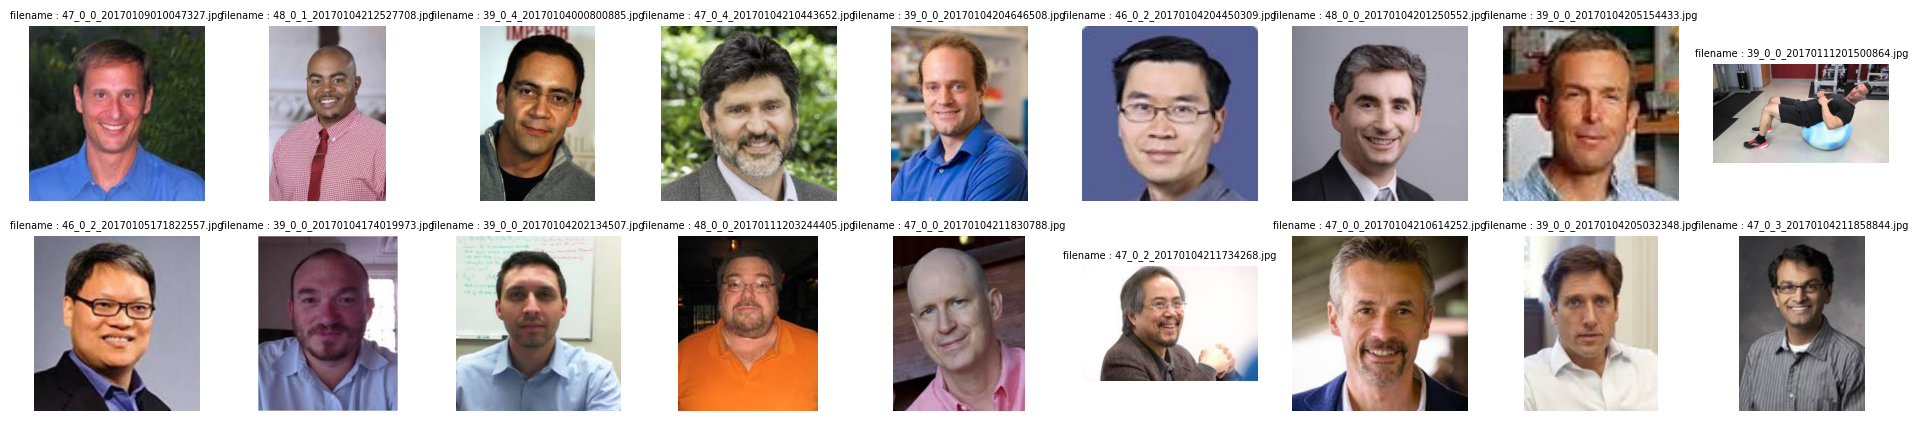

In [13]:
random_show_image(df_other, OTHER_PATH, 'Male')

⏩ Load my best accuracy model

In [14]:
vgg_model = tf.keras.models.load_model("model_finishvgg16_30.h5")

In [15]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 5, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 15360)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               3932416   
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 32)               

In [16]:
other_gen = ImageDataGenerator(rescale=1./255)
other_generator = other_gen.flow_from_dataframe(
    df_other, 
    OTHER_PATH,  
    x_col='Filenames',
    y_col=None,
    class_mode=None,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 276 validated image filenames.


⏩ Predict the other image dataset with my best model

In [17]:
vgg_model.evaluate(other_generator)

9/9 [==============================] - 1s 106ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [18]:
predict = vgg_model.predict(other_generator, steps=np.ceil(len(df_other)/BATCH_SIZE))

9/9 [==============================] - 58s 6s/step


In [19]:
prediction = predict.argmax(axis=-1)
df_other['Prediction'] = ["Male" if ele == 1 else "Female" for ele in prediction]

In [20]:
df_other

Age  Gender Race               DateTime                     Filenames  \
0    38  Female    4  20170109003326675.jpg  38_1_4_20170109003326675.jpg   
1    39    Male    0  20170103183230555.jpg  39_0_0_20170103183230555.jpg   
2    39    Male    0  20170103183234026.jpg  39_0_0_20170103183234026.jpg   
3    39    Male    0  20170104170046913.jpg  39_0_0_20170104170046913.jpg   
4    39    Male    0  20170104174019973.jpg  39_0_0_20170104174019973.jpg   
..   ..     ...  ...                    ...                           ...   
271  48    Male    0  20170111203244405.jpg  48_0_0_20170111203244405.jpg   
272  48    Male    1  20170104212527708.jpg  48_0_1_20170104212527708.jpg   
273  48    Male    1  20170111203317713.jpg  48_0_1_20170111203317713.jpg   
274  48    Male    1  20170111203549741.jpg  48_0_1_20170111203549741.jpg   
275  48    Male    2  20170104204459299.jpg  48_0_2_20170104204459299.jpg   

    Prediction  
0       Female  
1         Male  
2         Male  
3         Male  
4         Male  
..         ...  
271       Male  
272       Male  
273       Male  
274       Male  
275       Male  

[276 rows x 6 columns]

In [21]:
predict

array([[8.47927332e-01, 9.14372853e-04],
       [4.47254986e-01, 6.14517927e-01],
       [1.19653754e-01, 9.47386980e-01],
       [9.63620991e-02, 9.66506422e-01],
       [2.24537309e-02, 9.96208370e-01],
       [3.12499963e-02, 9.93231118e-01],
       [6.91855280e-03, 9.99344409e-01],
       [8.64117593e-02, 9.70434189e-01],
       [8.65956470e-02, 9.68750179e-01],
       [3.40637058e-01, 8.17243695e-01],
       [9.01781097e-02, 9.67762947e-01],
       [4.83652204e-02, 9.88606334e-01],
       [8.96820147e-03, 9.98958945e-01],
       [7.47671584e-03, 9.99189615e-01],
       [4.22623426e-01, 6.54871941e-01],
       [4.32193354e-02, 9.89286900e-01],
       [1.00253940e-01, 9.62875485e-01],
       [4.04118411e-02, 9.90521073e-01],
       [7.83454701e-02, 9.73998249e-01],
       [1.36434948e-02, 9.98238146e-01],
       [4.61995825e-02, 9.87534344e-01],
       [1.85000952e-02, 9.97131467e-01],
       [2.15783268e-01, 8.66107941e-01],
       [8.87262374e-02, 9.68897283e-01],
       [5.777637

In [22]:
prediction

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df_other['Gender'] , df_other['Prediction'])

In [24]:
accuracy

0.7753623188405797

In [25]:
df_wrong_predict = df_other.loc[df_other['Gender'] != df_other['Prediction'] , ['Filenames','Gender', 'Prediction']]
df_wrong_predict

Filenames  Gender Prediction
30   39_0_0_20170104205320147.jpg    Male     Female
35   39_0_0_20170105172311895.jpg    Male     Female
42   39_0_0_20170109011813551.jpg    Male     Female
57   39_0_3_20170104220730909.jpg    Male     Female
60   39_0_4_20170103235633060.jpg    Male     Female
..                            ...     ...        ...
246  47_1_4_20170103234719420.jpg  Female       Male
247  47_1_4_20170104181336102.jpg  Female       Male
256  48_0_0_20170104212017204.jpg    Male     Female
264  48_0_0_20170109012405234.jpg    Male     Female
266  48_0_0_20170111195354415.jpg    Male     Female

[62 rows x 3 columns]

C:\Users\rumah\AppData\Local\Temp\ipykernel_18956\1915710989.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = row[0]


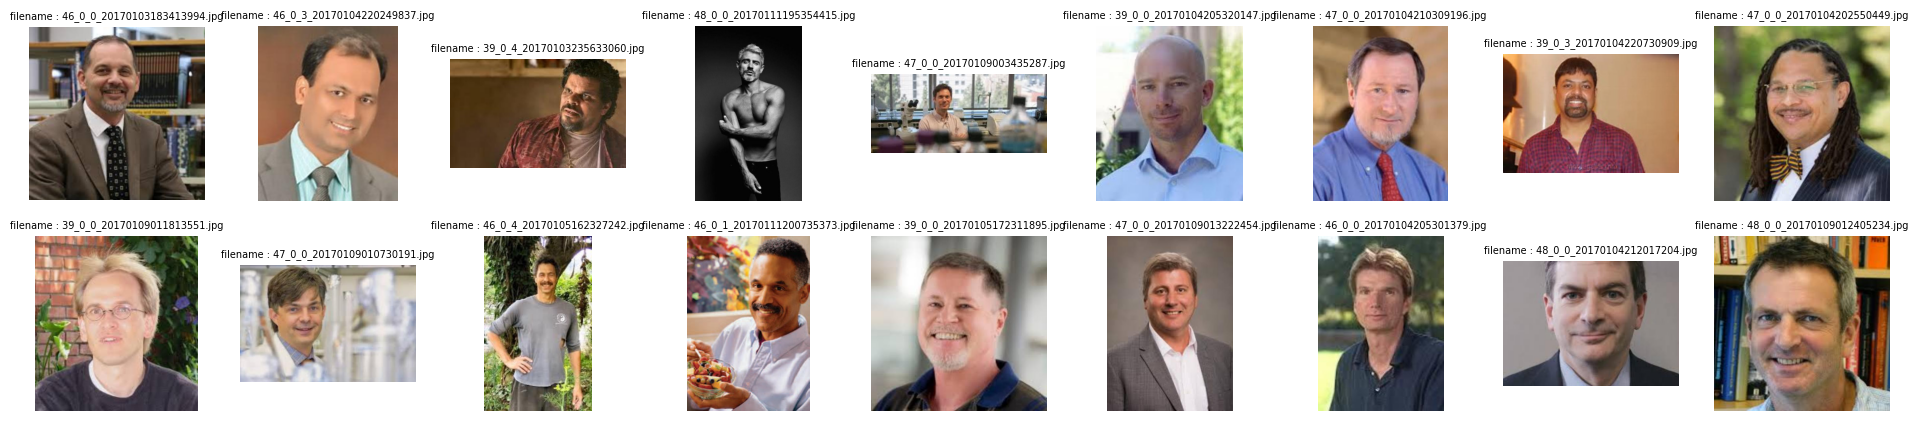

In [26]:
random_show_image(df_wrong_predict, OTHER_PATH, 'Male')

C:\Users\rumah\AppData\Local\Temp\ipykernel_18956\1915710989.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = row[0]


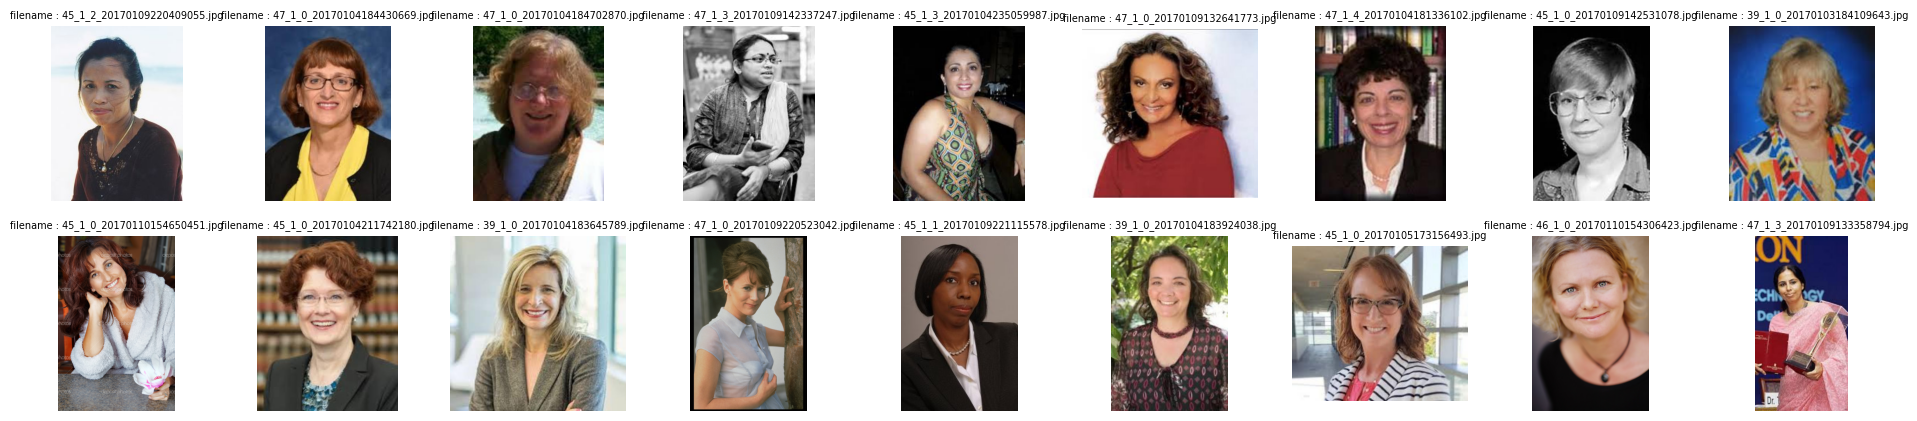

In [27]:
random_show_image(df_wrong_predict, OTHER_PATH, 'Female')

C:\Users\rumah\AppData\Local\Temp\ipykernel_18956\1915710989.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = row[0]


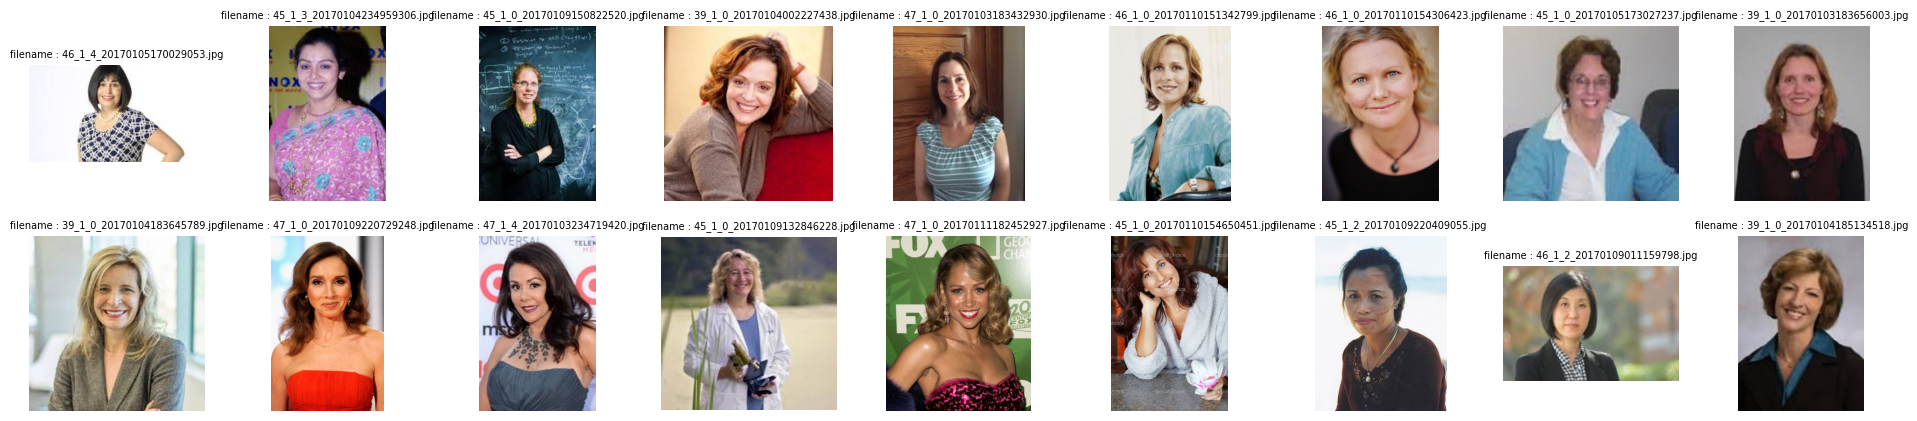

In [34]:
random_show_image(df_wrong_predict, OTHER_PATH, 'Female')

In [30]:
df_wrong_predict['Gender'].value_counts(normalize=True) * 100

Gender
Female    70.967742
Male      29.032258
Name: proportion, dtype: Float64

In [28]:
df_right_predict = df_other.loc[df_other['Gender'] == df_other['Prediction'] , ['Filenames','Gender', 'Prediction']]
df_right_predict

Filenames  Gender Prediction
0    38_1_4_20170109003326675.jpg  Female     Female
1    39_0_0_20170103183230555.jpg    Male       Male
2    39_0_0_20170103183234026.jpg    Male       Male
3    39_0_0_20170104170046913.jpg    Male       Male
4    39_0_0_20170104174019973.jpg    Male       Male
..                            ...     ...        ...
271  48_0_0_20170111203244405.jpg    Male       Male
272  48_0_1_20170104212527708.jpg    Male       Male
273  48_0_1_20170111203317713.jpg    Male       Male
274  48_0_1_20170111203549741.jpg    Male       Male
275  48_0_2_20170104204459299.jpg    Male       Male

[214 rows x 3 columns]

C:\Users\rumah\AppData\Local\Temp\ipykernel_18956\1915710989.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = row[0]


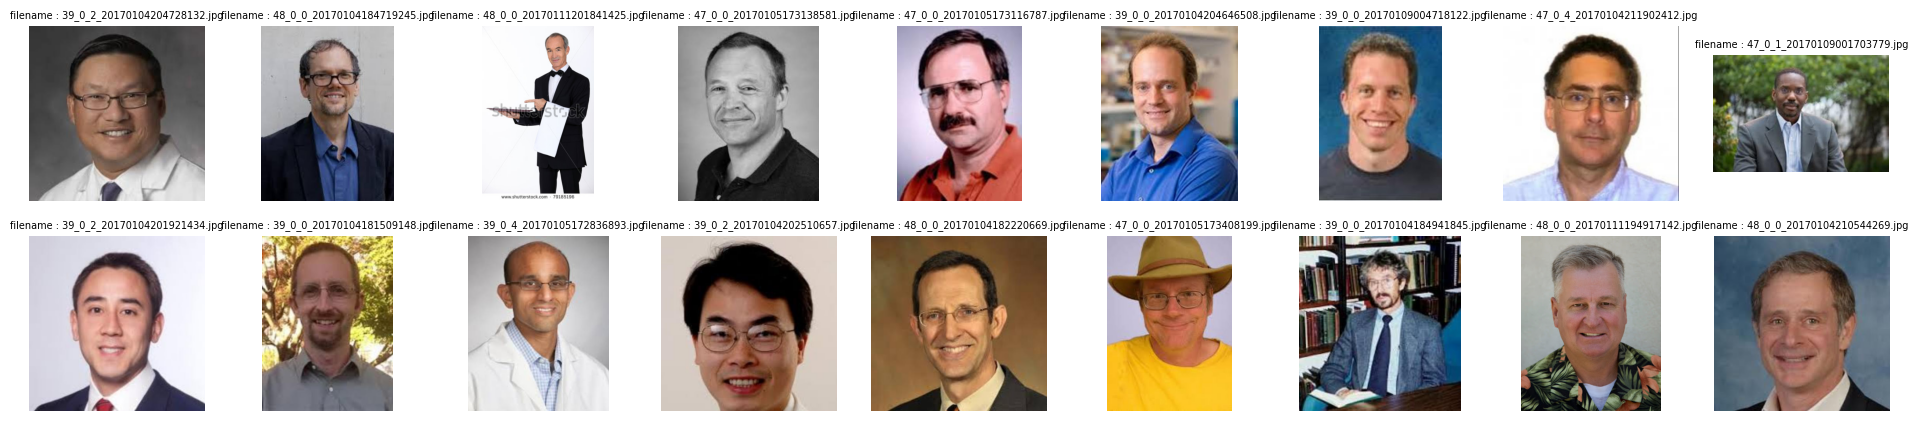

In [31]:
random_show_image(df_right_predict, OTHER_PATH, 'Male')

C:\Users\rumah\AppData\Local\Temp\ipykernel_18956\1915710989.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = row[0]


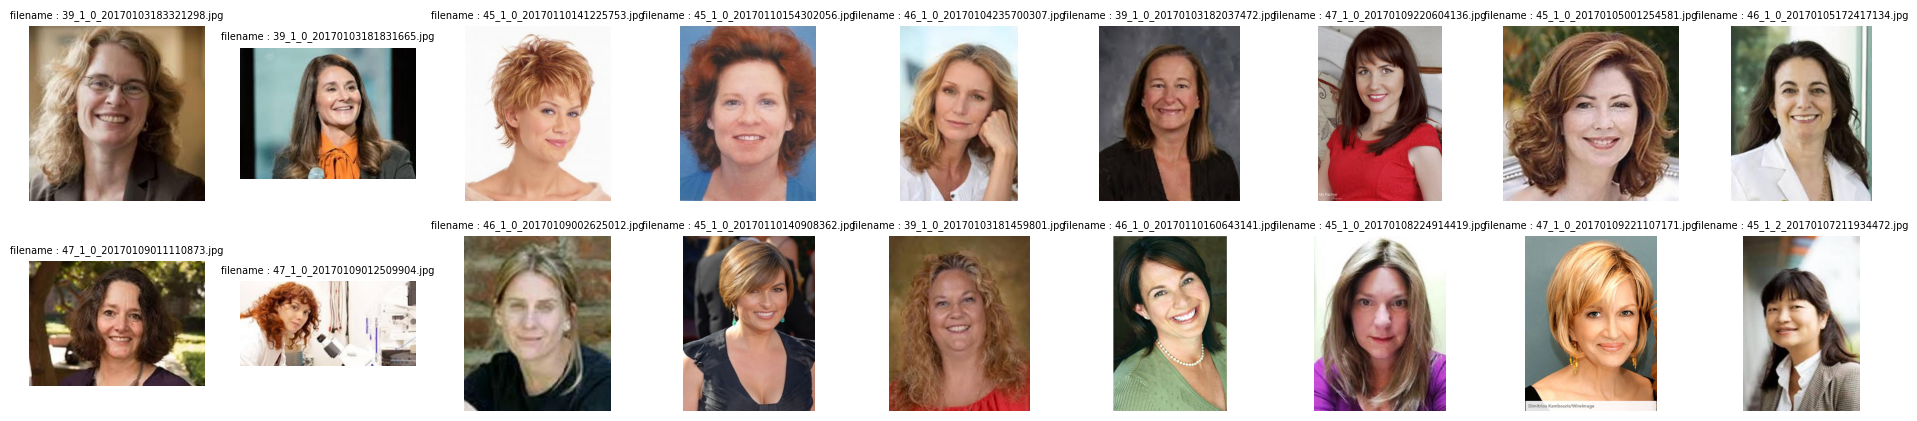

In [32]:
random_show_image(df_right_predict, OTHER_PATH, 'Female')

C:\Users\rumah\AppData\Local\Temp\ipykernel_18956\1915710989.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = row[0]


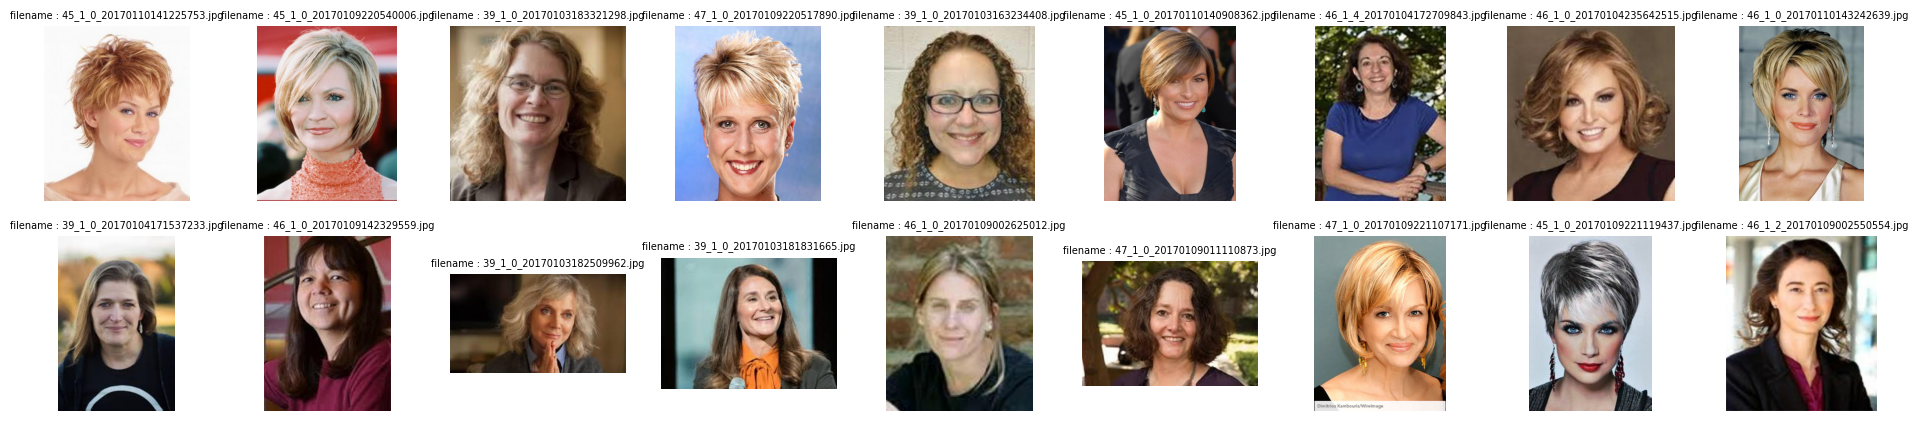

In [33]:
random_show_image(df_right_predict, OTHER_PATH, 'Female')

In [72]:
labels = ['Male','Female']

cm = confusion_matrix(df_other['Gender'], df_other["Prediction"], labels= labels)
cm

array([[160,  18],
       [ 44,  54]], dtype=int64)

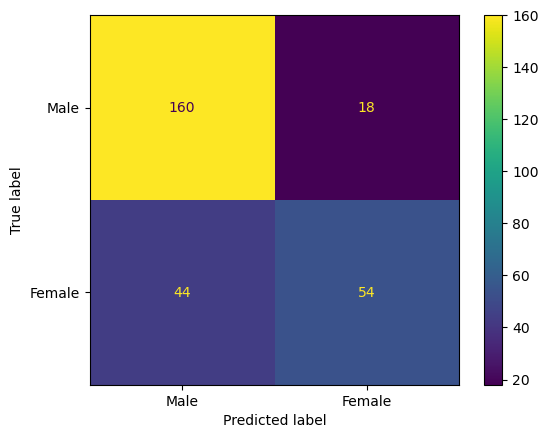

In [73]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

In [77]:
cm

array([[160,  18],
       [ 44,  54]], dtype=int64)